## Workshop 3(Part 2)

**Analyzing Omicorn variant's effect globally. It was first detected in South Africa in November 2021.**

In [1]:
import os, re, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from IPython.display import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Omicorn variant was detected in South Africa in November 2021. Here, in this notebook, we will be checking Omicorn effect globally. Omicorn variant is considered weakest variant among all variant and have low death rate. Omicorn variant is contagious and spread rapidly compared to other variants.

In [2]:
root = 'Covid'
recent_date = "02-02-2022"
previous_date = "12-01-2021"
duplicate_columns = {"Lat": "Latitude", 
                    "Long_": "Longitude",
                    "Incidence_Rate": "Incident_Rate",
                    "Case-Fatality_Ratio": "Case_Fatality_Ratio",
                    "Province/State": "Province_State",
                    "Country/Region": "Country_Region",
                    "Last Update": "Last_Update"}
recent_df = pd.read_csv(os.path.join(root, (recent_date + ".csv")))
previous_df = pd.read_csv(os.path.join(root, (previous_date + ".csv")))

for key, value in duplicate_columns.items(): 
    if key in recent_df.columns:
        recent_df = recent_df.rename(columns={key: value}) 
    if key in previous_df.columns:
        previous_df = previous_df.rename(columns={key: value})

Didplaying first 5 rows of a dataframe.

In [3]:
recent_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-02-03 04:21:21,33.93911,67.709953,164190,7418,NaN,NaN,Afghanistan,421.774974,4.517937
1,NaN,NaN,NaN,Albania,2022-02-03 04:21:21,41.15330,20.168300,261240,3362,NaN,NaN,Albania,9077.767739,1.286939
2,NaN,NaN,NaN,Algeria,2022-02-03 04:21:21,28.03390,1.659600,254885,6604,NaN,NaN,Algeria,581.251853,2.590972
3,NaN,NaN,NaN,Andorra,2022-02-03 04:21:21,42.50630,1.521800,36315,146,NaN,NaN,Andorra,47000.582411,0.402038
4,NaN,NaN,NaN,Angola,2022-02-03 04:21:21,-11.20270,17.873900,98267,1895,NaN,NaN,Angola,298.990442,1.928420


In [4]:
previous_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-12-02 04:22:37,33.93911,67.709953,157359,7309,NaN,NaN,Afghanistan,404.227347,4.644793
1,NaN,NaN,NaN,Albania,2021-12-02 04:22:37,41.15330,20.168300,200173,3101,NaN,NaN,Albania,6955.764820,1.549160
2,NaN,NaN,NaN,Algeria,2021-12-02 04:22:37,28.03390,1.659600,210723,6076,NaN,NaN,Algeria,480.542732,2.883406
3,NaN,NaN,NaN,Andorra,2021-12-02 04:22:37,42.50630,1.521800,17426,131,NaN,NaN,Andorra,22553.549473,0.751750
4,NaN,NaN,NaN,Angola,2021-12-02 04:22:37,-11.20270,17.873900,65183,1735,NaN,NaN,Angola,198.327963,2.661737


Creating dataframe named current_df with columns Province_State,Country_Region,Confirmed, and Deaths. Adding data to the dataframe.

In [5]:
current_df = pd.DataFrame(columns=['Province_State','Country_Region','Confirmed','Deaths'])
current_df['Province_State'] = recent_df['Province_State']
current_df['Country_Region'] = recent_df['Country_Region']
current_df['Confirmed'] = recent_df['Confirmed'] - previous_df['Confirmed'] 
current_df['Deaths'] = recent_df['Deaths'] - previous_df['Deaths'] 

Printing rows and columns of a dataframe using function shape in a recently created dataframe.

In [6]:
current_df.shape

(4010, 4)

In [7]:
name_number = 'SubasThapa-2128468.csv'
current_df.to_csv(name_number, index=False)

Reading csv file we created above.

In [8]:
data = pd.read_csv(name_number)

In [9]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths
0,NaN,Afghanistan,6831.0,109.0
1,NaN,Albania,61067.0,261.0
2,NaN,Algeria,44162.0,528.0
3,NaN,Andorra,18889.0,15.0
4,NaN,Angola,33084.0,160.0


Using lambda function to check and count number of null values present in all columns of a dataframe.

In [10]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

Province_State    176
Country_Region      0
Confirmed           2
Deaths              2
dtype: int64

If Province_State column contains null values then replace it with Country_Region column's values.

In [11]:
data.loc[data['Province_State'].isnull(),'Province_State'] = data['Country_Region']

Printing number of unique Country_Region values.

In [12]:
print(data['Country_Region'].nunique())

198


Using geopy.geocoders library to get latitude and longitude value from place name. 

In [13]:
import datetime, time, requests
from time import sleep
from geopy.geocoders import Nominatim
def get_lat_lon(place):
    geolocator = Nominatim(user_agent=name_number)
    location = geolocator.geocode(place)
    lat_lon = location.latitude, location.longitude
 
    output = [float(i) for i in lat_lon]
    return output

In [14]:
states = data['Province_State'].unique()
print("Number of unique States - ", len(states))

Number of unique States -  769


In [15]:
data['Province_State'].value_counts()

Texas          255
Georgia        162
Virginia       134
Kentucky       121
Missouri       117
              ... 
Maharashtra      1
Manipur          1
Meghalaya        1
Mizoram          1
Guernsey         1
Name: Province_State, Length: 769, dtype: int64

Library tqdm is used for smart progress bar. While using geopy.geocoders library to convert place to Latitude and Longitude value, we use tqdm to show the progress.

In [16]:
from tqdm import tqdm
geo_lat = []
geo_lon = []
not_found = []
found = []
for state in tqdm(states):
    time.sleep(0.2)
    lat_lon = [None, None]
    try:
        lat_lon = get_lat_lon(state)
        found.append(state)
    except: 
        not_found.append(state)
 
    geo_lat.append(lat_lon[0])
    geo_lon.append(lat_lon[1])
        
if len(not_found) > 0:
    print("Locations are not found for - ", not_found)
else:
    print("Found all the locations")

100%|████████████████████████████████████████████████████████████████████████████████| 769/769 [08:49<00:00,  1.45it/s]

Locations are not found for -  ['Repatriated Travellers', 'W.P. Labuan', 'Bonaire, Sint Eustatius and Saba', 'Sakha (Yakutiya) Republic', 'Summer Olympics 2020']


In [17]:
states_list = states.tolist() #converting states to list to index list's items 
lats = []
lons = []
for i, r in data.iterrows():
    state = r['Province_State']
    index_list = states_list.index(state)
    lats.append(geo_lat[index_list])
    lons.append(geo_lon[index_list])
 
 
data['Latitude'] = lats
data['Longitude'] = lons

Using lambda function to count number of null values in all column of a dataframe.

In [18]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

Province_State    0
Country_Region    0
Confirmed         2
Deaths            2
Latitude          5
Longitude         5
dtype: int64

Dropping null values from all columns using dropna function.

In [19]:
data.dropna(inplace=True)

In [20]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

Province_State    0
Country_Region    0
Confirmed         0
Deaths            0
Latitude          0
Longitude         0
dtype: int64

In [21]:
clustering_data = data[["Confirmed", "Deaths"]]

In [22]:
clustering_data.head()

,Confirmed,Deaths
0,6831.0,109.0
1,61067.0,261.0
2,44162.0,528.0
3,18889.0,15.0
4,33084.0,160.0


In the below step, we used scaling technique where column are rescaled so that they demonstrate the properties of a standard Gaussian distribution.

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit(clustering_data).transform(clustering_data.astype(np.float))

In the below step, we create Scree plot to identify number of clusters which will be used in the algorithm.

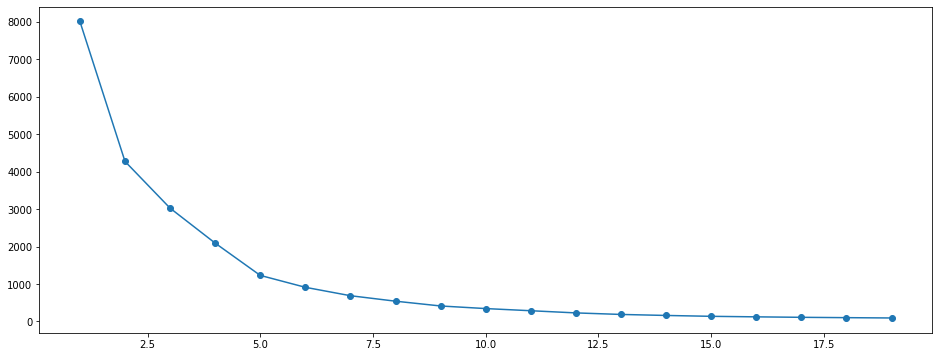

In [24]:
cluster_range = range( 1, 20 )
cluster_errors = []
for num_clusters in cluster_range:
 clusters = KMeans( num_clusters )
 clusters.fit( X_scaled )
 cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
 "cluster_errors": cluster_errors } )
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the inertia start decreasing in a linear fashion. Thus for the above cluster, we conclude that the optimal number of clusters is 4. Our value for K will be 4.

In [25]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X_scaled)
#beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
clustering_data['cluster'] = cluster

In [26]:
kmeans_mean_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Confirmed,Deaths
cluster,,
1,23430.8,102.8
2,1918572.8,13104.8
3,9079136.0,11434.0
4,50551.0,-23143.0


In [27]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 2]

,Province_State,cluster
6,Argentina,2
265,Kerala,2
510,Poland,2
672,Turkey,2
4001,Vietnam,2


In [28]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 3]

,Province_State,cluster
216,France,3
3986,England,3


In [29]:
def get_color(cluster_id):
    if cluster_id == 2:
        return 'darkred'
    if cluster_id == 1:
        return 'green' 
    if cluster_id == 3:
        return 'orange'
    if cluster_id == 4:
        return 'yellow'
 
data["color"] = data["cluster"].apply(lambda x: get_color(x))

We use follium to display and plot the output of clusters in a world map.

In [30]:
this_map = folium.Map(location =[data["Latitude"].mean(), 
 data["Longitude"].mean()], zoom_start=5)
def plot_dot(point): 
 '''input: series that contains a numeric named latitude and a numeric named longitude
 this function creates a CircleMarker and adds it to your this_map'''
 folium.CircleMarker(location=[point.Latitude, point.Longitude],
 radius=2, 
color=point.color,
 weight=1).add_to(this_map)
 
 
#clustered_full.apply(,axis=1) #use this to iterate through every row in your dataframe
data.apply(plot_dot, axis = 1)
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
#Save the map to an HTML file
this_map.save(os.path.join('covid_map_Omicorn_Variant.html'))